<a href="https://colab.research.google.com/github/xsinxxer/starters/blob/main/ai_explaiability_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Lets first import MNIST Dataset as starter

11490434/11490434 [==============================] - 0s 0us/step


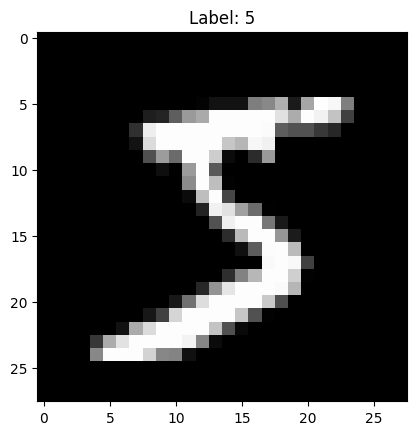

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4674 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.9142
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2735 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9262


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

In [4]:
np.argmax(model.predict(x_train[0].reshape(1,28,28)))

1/1 [==============================] - 0s 102ms/step


5

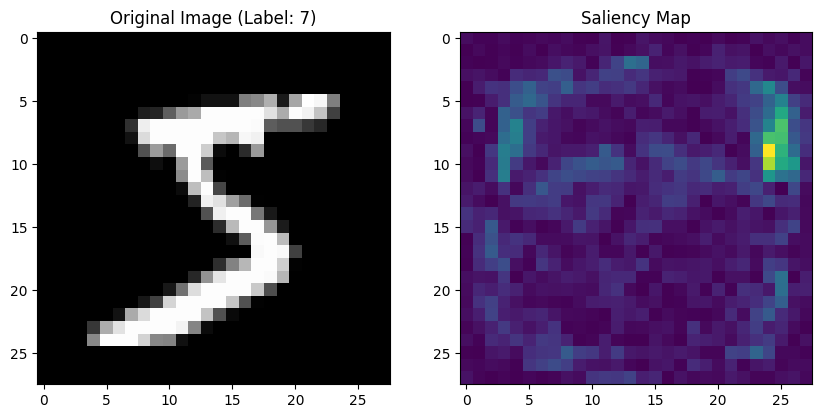

In [3]:
img_index = 0
img = x_train[img_index]
img_tensor = tf.convert_to_tensor(img.reshape(1, 28, 28), dtype=tf.float32)
#compute the gradient of the prediction with respect to the input image
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    prediction = model(img_tensor)
    loss = prediction[0, tf.argmax(prediction[0])]
#gradients of the loss with respect to the input image
gradient = tape.gradient(loss, img_tensor)
# Process the gradients
gradient = tf.abs(gradient)
gradient = gradient[0]
gradient = (gradient - tf.reduce_min(gradient)) / (tf.reduce_max(gradient) - tf.reduce_min(gradient))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title(f"Original Image (Label: {y_test[img_index]})")
plt.imshow(x_train[img_index], cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Saliency Map")
plt.imshow(gradient.numpy())
plt.show()

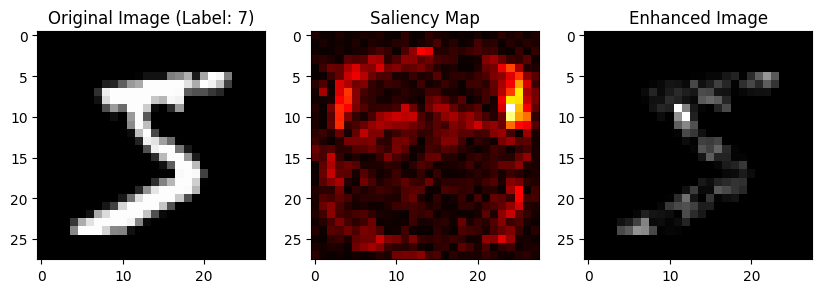

In [5]:
# Multiply element-wise with the original image
saliency_map = img * gradient.numpy()
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title(f"Original Image (Label: {y_test[img_index]})")
plt.imshow(x_train[img_index], cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Saliency Map")
plt.imshow(gradient.numpy(), cmap='hot')
plt.subplot(1, 3, 3)
plt.title("Enhanced Image")
plt.imshow(saliency_map, cmap='gray')
plt.show()




# works shit!!

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3043 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1496 - accuracy: 0.9562
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1098 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0860 - accuracy: 0.9751
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0697 - accuracy: 0.9786


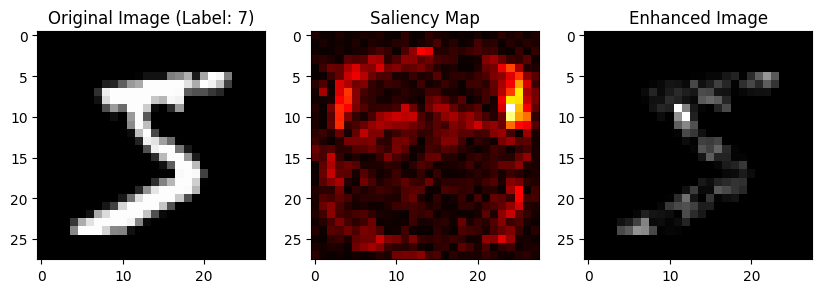

In [7]:
# Multiply element-wise with the original image
saliency_map = img * gradient.numpy()
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title(f"Original Image (Label: {y_test[img_index]})")
plt.imshow(x_train[img_index], cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Saliency Map")
plt.imshow(gradient.numpy(), cmap='hot')
plt.subplot(1, 3, 3)
plt.title("Enhanced Image")
plt.imshow(saliency_map, cmap='gray')
plt.show()


# I guess they just dont work good with ann,only cnn as u will later see

**Lets try again with adding l1,l2 loss**

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l1(0.0035))
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1574 - accuracy: 0.8447
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0217 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0119 - accuracy: 0.8644
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0084 - accuracy: 0.8644
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0059 - accuracy: 0.8647


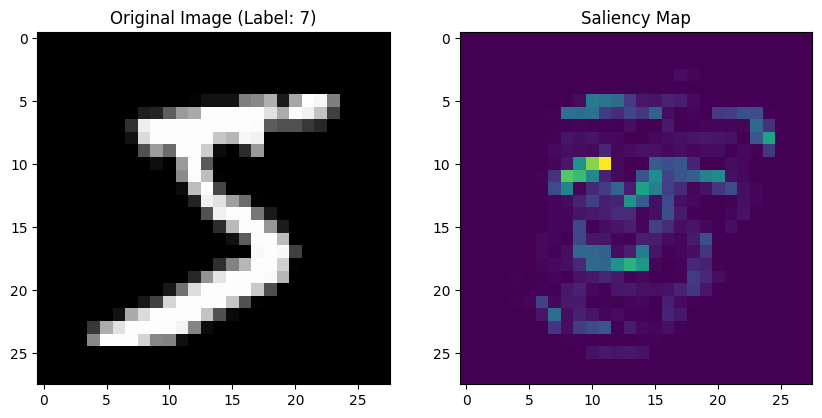

In [9]:
img_index = 0
img = x_train[img_index]
img_tensor = tf.convert_to_tensor(img.reshape(1, 28, 28), dtype=tf.float32)
#compute the gradient of the prediction with respect to the input image
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    prediction = model(img_tensor)
    loss = prediction[0, tf.argmax(prediction[0])]
#gradients of the loss with respect to the input image
gradient = tape.gradient(loss, img_tensor)
# Process the gradients
gradient = tf.abs(gradient)
gradient = gradient[0]
gradient = (gradient - tf.reduce_min(gradient)) / (tf.reduce_max(gradient) - tf.reduce_min(gradient))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title(f"Original Image (Label: {y_test[img_index]})")
plt.imshow(x_train[img_index], cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Saliency Map")
plt.imshow(gradient.numpy())
plt.show()

(784, 10)
(784,)


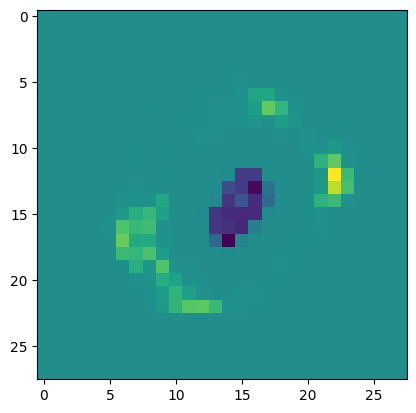

In [10]:
def plot_weights(weights, title):
    plt.figure(figsize=(10, 5))
    plt.imshow(weights, cmap='viridis', aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xlabel('Output Neurons')
    plt.ylabel('Input Neurons')
    plt.show()
trained_weights = model.layers[1].get_weights()[0]
print(trained_weights.shape)
print(trained_weights[:,0].shape)
plt.imshow(trained_weights[:,0].reshape(28,28))

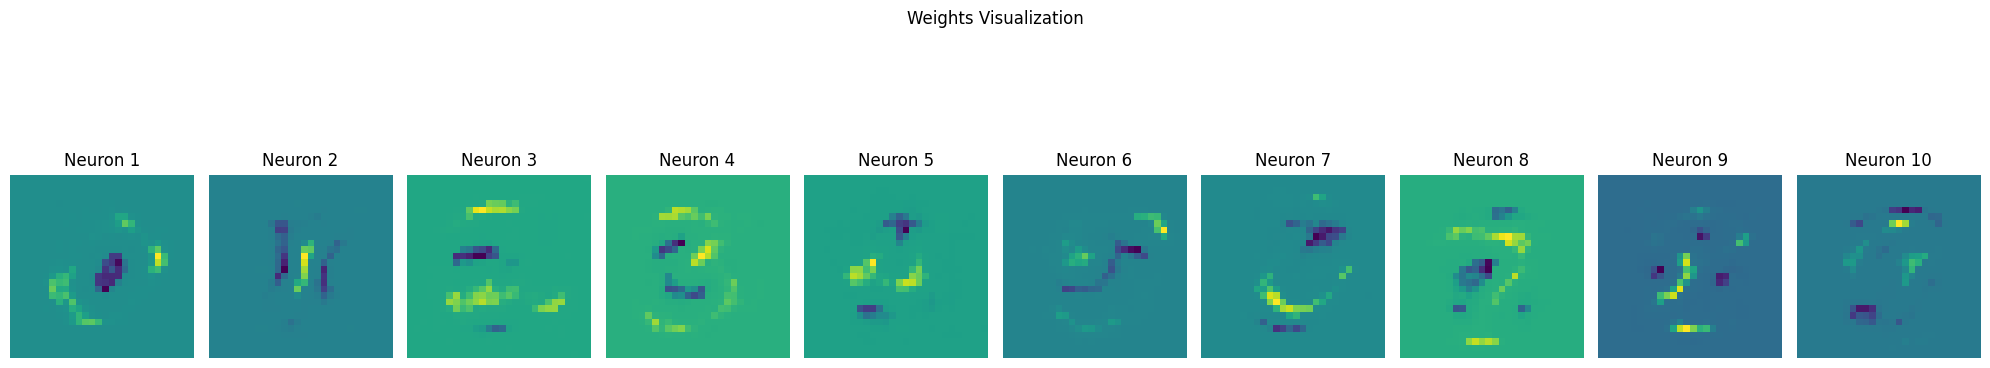

In [11]:
import matplotlib.pyplot as plt
def plot_weights(weights, title):
    num_neurons = weights.shape[1]
    fig, axes = plt.subplots(1, num_neurons, figsize=(20, 5))
    for i in range(num_neurons):
        ax = axes[i]
        ax.imshow(weights[:, i].reshape(28, 28), cmap='viridis')
        ax.set_title(f'Neuron {i+1}')
        ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
plot_weights(trained_weights, 'Weights Visualization')


**my approach shows better visualisation than vanilla huh**

In [12]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l1(0.01))
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3253 - accuracy: 0.7932
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5662 - accuracy: 0.8312
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5063 - accuracy: 0.8347
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4862 - accuracy: 0.8384
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4735 - accuracy: 0.8387


In [13]:
trained_weights = model.layers[1].get_weights()[0]
print(trained_weights.shape)
print(trained_weights[:,0].shape)

(784, 60)
(784,)


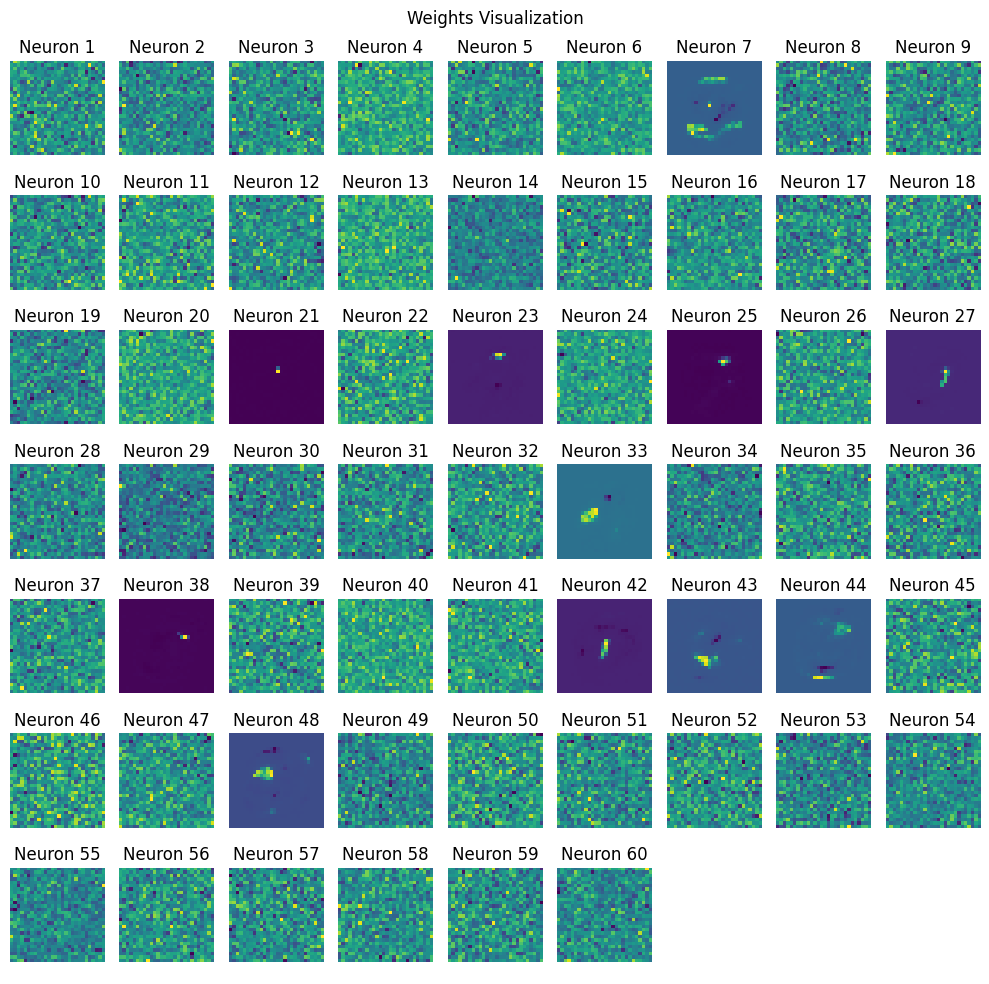

In [14]:
import matplotlib.pyplot as plt

def plot_weights(weights, title):
    num_neurons = weights.shape[1]
    num_rows = int(num_neurons ** 0.5)
    num_cols = (num_neurons + num_rows - 1) // num_rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        if i < num_neurons:
            ax.imshow(weights[:, i].reshape(28, 28), cmap='viridis')
            ax.set_title(f'Neuron {i+1}')
            ax.axis('off')
        else:
            ax.axis('off')  #hides empty subplots
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
plot_weights(trained_weights, 'Weights Visualization')

# unlike previous notrebook, we see this time a neat interpretation

In [15]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 62s 33ms/step - loss: 0.1552 - accuracy: 0.9538


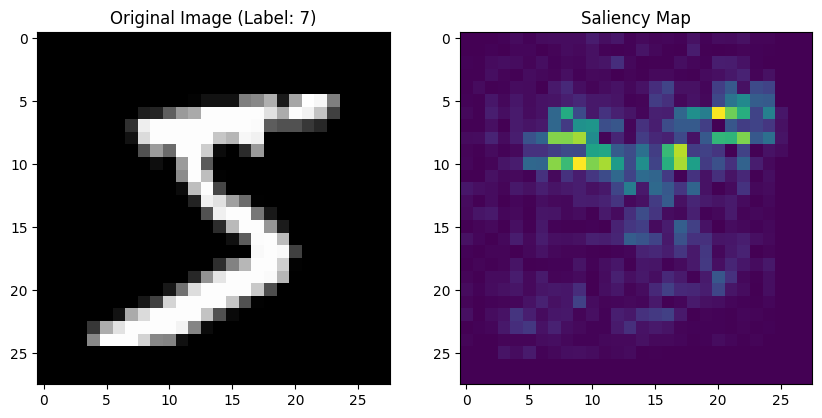

In [16]:
img_index = 0
img = x_train[img_index]
img_tensor = tf.convert_to_tensor(img.reshape(1, 28, 28), dtype=tf.float32)
#compute the gradient of the prediction with respect to the input image
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    prediction = model(img_tensor)
    loss = prediction[0, tf.argmax(prediction[0])]
#gradients of the loss with respect to the input image
gradient = tape.gradient(loss, img_tensor)
# Process the gradients
gradient = tf.abs(gradient)
gradient = gradient[0]
gradient = (gradient - tf.reduce_min(gradient)) / (tf.reduce_max(gradient) - tf.reduce_min(gradient))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title(f"Original Image (Label: {y_test[img_index]})")
plt.imshow(x_train[img_index], cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Saliency Map")
plt.imshow(gradient.numpy())
plt.show()

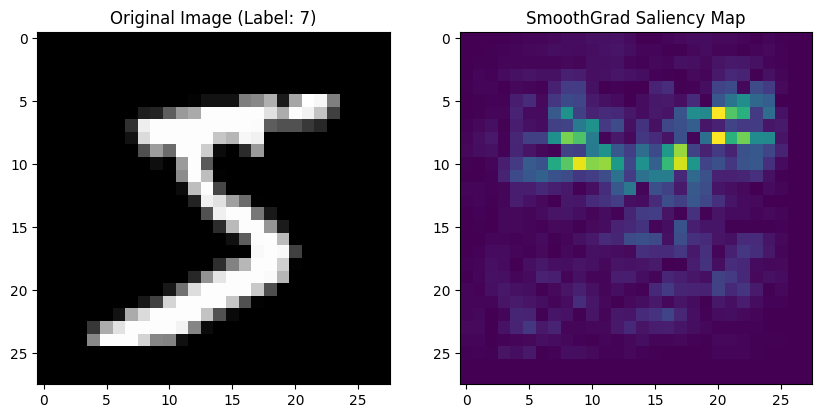

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
num_samples = 50
noise_level = 0.1#noise level

def add_noise(image, noise_level):
    noise = tf.random.normal(shape=image.shape, mean=0.0, stddev=noise_level)
    noisy_image = tf.clip_by_value(image + noise, 0.0, 1.0)
    return noisy_image

perturbed_gradients = []
for _ in range(num_samples):
    perturbed_img = add_noise(img_tensor, noise_level)
    with tf.GradientTape() as tape:
        tape.watch(perturbed_img)
        prediction = model(perturbed_img)
        loss = prediction[0, tf.argmax(prediction[0])]
    gradient = tape.gradient(loss, perturbed_img)
    perturbed_gradients.append(gradient)
smoothed_gradient = tf.reduce_mean(perturbed_gradients, axis=0)
smoothed_gradient = tf.abs(smoothed_gradient)
smoothed_gradient = smoothed_gradient[0]
smoothed_gradient = (smoothed_gradient - tf.reduce_min(smoothed_gradient)) / (tf.reduce_max(smoothed_gradient) - tf.reduce_min(smoothed_gradient))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title(f"Original Image (Label: {y_test[img_index]})")
plt.imshow(x_train[img_index], cmap='gray')
plt.subplot(1, 2, 2)
plt.title("SmoothGrad Saliency Map")
plt.imshow(smoothed_gradient.numpy())
plt.show()


# My guess is if you add l1,l2 loss,youll better visualise

In [18]:
import tensorflow as tf

l1_penalty = 0.005
l2_penalty = 0.005
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1_penalty, l2=l2_penalty), input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1_penalty, l2=l2_penalty)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1_penalty, l2=l2_penalty))
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 54s 28ms/step - loss: 1.0954 - accuracy: 0.8469


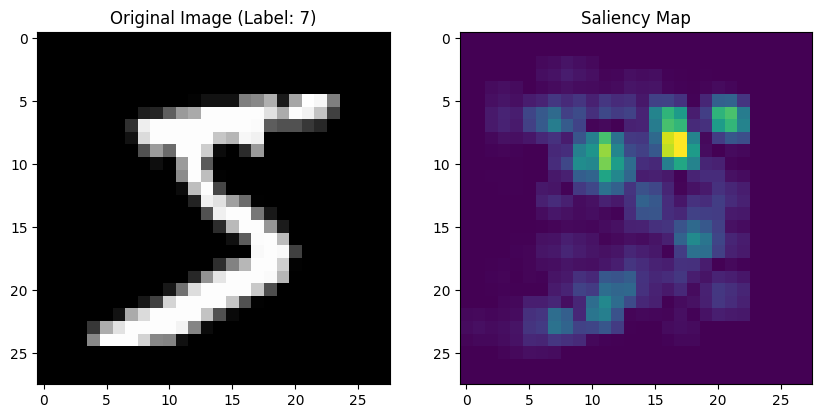

In [19]:
img_index = 0
img = x_train[img_index]
img_tensor = tf.convert_to_tensor(img.reshape(1, 28, 28), dtype=tf.float32)
#compute the gradient of the prediction with respect to the input image
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    prediction = model(img_tensor)
    loss = prediction[0, tf.argmax(prediction[0])]
#gradients of the loss with respect to the input image
gradient = tape.gradient(loss, img_tensor)
# Process the gradients
gradient = tf.abs(gradient)
gradient = gradient[0]
gradient = (gradient - tf.reduce_min(gradient)) / (tf.reduce_max(gradient) - tf.reduce_min(gradient))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title(f"Original Image (Label: {y_test[img_index]})")
plt.imshow(x_train[img_index], cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Saliency Map")
plt.imshow(gradient.numpy())
plt.show()